In [1]:
import pandas as pd

In [2]:
from sklearn.metrics import mean_squared_error

In [4]:
data=pd.read_excel('pondperformance.xlsx')


In [5]:
data

,date,DOC,pond_area,feeding_company,no_feed,feed1(6am),feed2(10am),feed3(2pm),feed4(6pm),total_feed,...,Biomass,FCR,count,cost,cost1,current_bill,recurrent_inventory,c_current_bill,c_recurrent_inventory,capital
0,2014-04-29,1,0.4,CP,0,1.0,0.0,0.0,1.0,2.0,...,0.000,NaN,NaN,160,NaN,2666.666667,1142.857143,2666.666667,1142.857143,300000
1,2014-04-30,2,0.4,CP,0,1.5,0.0,0.0,1.5,3.0,...,0.200,25.000000,1000000.000000,400,1.540095e+06,2666.666667,1142.857143,5333.333333,2285.714286,300000
2,2014-05-01,3,0.4,CP,0,2.0,0.0,0.0,2.0,4.0,...,1.400,6.428571,142857.142857,720,2.229633e+05,2666.666667,1142.857143,8000.000000,3428.571429,300000
3,2014-05-02,4,0.4,CP,0,2.5,0.0,0.0,2.5,5.0,...,1.800,7.777778,111111.111111,1120,1.757545e+05,2666.666667,1142.857143,10666.666667,4571.428571,300000
4,2014-05-03,5,0.4,CP,0,3.0,0.0,0.0,3.5,6.5,...,18.200,1.126374,10989.010989,1640,1.762020e+04,2666.666667,1142.857143,13333.333333,5714.285714,300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2014-08-22,116,0.4,CP,4,13.0,12.5,12.5,13.0,51.0,...,3436.290,1.242386,51.072523,341536,3.152938e+02,2666.666667,1142.857143,309333.333333,132571.428571,300000
116,2014-08-23,117,0.4,CP,4,13.0,13.0,13.0,13.0,52.0,...,3446.820,1.253677,50.916497,345696,3.166427e+02,2666.666667,1142.857143,312000.000000,133714.285714,300000
117,2014-08-24,118,0.4,CP,4,13.0,13.5,13.5,13.0,53.0,...,3466.125,1.261986,50.632911,349936,3.172014e+02,2666.666667,1142.857143,314666.666667,134857.142857,300000
118,2014-08-25,119,0.4,CP,4,13.0,13.5,13.5,13.0,53.0,...,3485.430,1.270202,50.352467,354176,3.177540e+02,2666.666667,1142.857143,317333.333333,136000.000000,300000


In [6]:
data.tail(2)

,date,DOC,pond_area,feeding_company,no_feed,feed1(6am),feed2(10am),feed3(2pm),feed4(6pm),total_feed,...,Biomass,FCR,count,cost,cost1,current_bill,recurrent_inventory,c_current_bill,c_recurrent_inventory,capital
118,2014-08-25,119,0.4,CP,4,13.0,13.5,13.5,13.0,53.0,...,3485.43,1.270202,50.352467,354176,317.754003,2666.666667,1142.857143,317333.333333,136000.000000,300000
119,2014-08-26,120,0.4,CP,4,13.0,13.5,13.5,13.0,53.0,...,3200.00,1.400062,50.000000,358416,348.612143,2666.666667,1142.857143,320000.000000,137142.857143,300000


In [7]:
w=data['CDG'][1:120]

In [8]:
#cf=data['cumulative_feed'][1:120]*80
c=data['count'][1:120]

In [9]:
Y=[]
z=[]
d=data['DOC'][1:120]

In [10]:
for i in range(1,120,1):
        if(c[i]>100):
            Y.append(100)
        elif(c[i]>90):
            Y.append(200)
        elif(c[i]>80):
            Y.append(210)
        elif(c[i]>70):
            Y.append(230)
        elif(c[i]>60):
            Y.append(250)
        elif(c[i]>50):
            Y.append(280)
        elif(c[i]>40):
            Y.append(300)
        elif(c[i]>30):
            Y.append(340)
        else:
            Y.append(440)
        z.append(w[i])

In [11]:
profit=Y-data['cost1'][1:120]

In [12]:
Y

[100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 200,
 200,
 200,
 200,
 200,
 200,
 210,
 210,
 210,
 210,
 210,
 210,
 210,
 230,
 230,
 230,
 230,
 230,
 230,
 230,
 230,
 230,
 230,
 230,
 250,
 250,
 250,
 250,
 250,
 250,
 250,
 250,
 250,
 250,
 250,
 250,
 250,
 250,
 250,
 280,
 280,
 280,
 280,
 280,
 280,
 280,
 280,
 280,
 280,
 280,
 280,
 280,
 280,
 280,
 280,
 280,
 280,
 280,
 280,
 280,
 280,
 280,
 280,
 280,
 280,
 300]

In [13]:
profit

1     -1.539995e+06
2     -2.228633e+05
3     -1.756545e+05
4     -1.752020e+04
5     -1.542511e+03
           ...     
115   -3.529375e+01
116   -3.664267e+01
117   -3.720143e+01
118   -3.775400e+01
119   -4.861214e+01
Name: cost1, Length: 119, dtype: float64

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
#from sklearn.linear_model import LinearRegression

In [15]:
df_1 = pd.DataFrame(Y)
df_2 = pd.DataFrame(z)
#df_3 = pd.DataFrame(Fcr)
df = pd.concat([df_1, df_2], axis=1)

In [380]:
#df

In [381]:
#df.shape

In [382]:
#df_1

In [383]:
#lm=linear_model.LinearRegression()
#model=lm.fit(df_1,df_2)

In [384]:
#model.coef_

In [385]:
#model.intercept_

In [16]:
import seaborn as sns

In [17]:
L=d[4:120]
K=profit[4:120]

C:\Users\Praveen\3D Objects\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


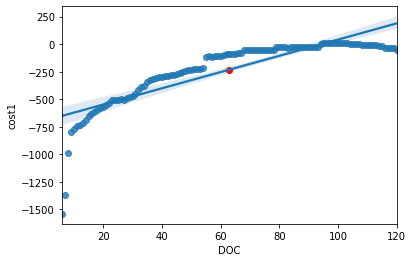

In [18]:
plt.figure()
sns.regplot(L,K,fit_reg=True)
plt.scatter(np.mean(L),np.mean(K),color="red")

In [19]:
curve1=np.polyfit(L,K,2)
poly1=np.poly1d(curve1)
print(poly1)

         2
-0.1282 x + 23.53 x - 1064


In [20]:
K_n=[]
for i in L:
    pol=poly1(i)
    K_n.append(pol)

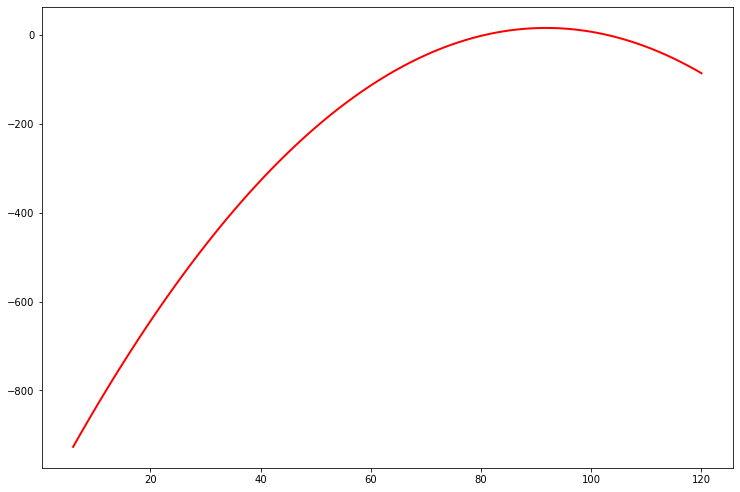

In [21]:
fig=plt.figure()
myaxes=fig.add_axes([0.1,0.1,1.6,1.6])
myaxes.plot(L,K_n,'r',lw=2,label='pond1')


In [22]:
curve2=np.polyfit(L,K,3)
poly2=np.poly1d(curve1)
print(poly2)

         2
-0.1282 x + 23.53 x - 1064


In [23]:
K_n2=[]
for i in L:
    pol=poly2(i)
    K_n2.append(pol)

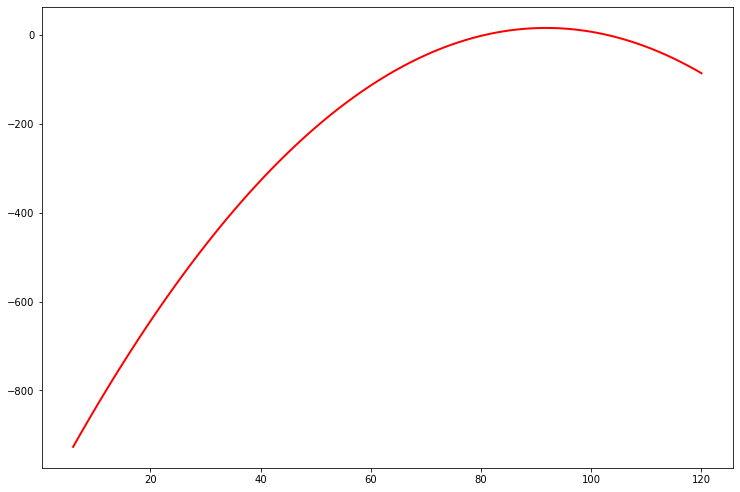

In [394]:
fig=plt.figure()
myaxes=fig.add_axes([0.1,0.1,1.6,1.6])
myaxes.plot(L,K_n2,'r',lw=2,label='pond1')


In [24]:
mean_squared_error(K, K_n2)

6792.747100862669

In [25]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

In [26]:
hi=pd.DataFrame.from_dict(profit)

In [27]:
#dataset = pd.read_csv('Position_Salaries.csv') 
X = data.iloc[4:120,1].values 
y = hi.iloc[3:, 0].values

In [28]:
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler() 
sc_y = StandardScaler() 
X = sc_X.fit_transform(X.reshape(-1,1)) 
y = sc_y.fit_transform(y.reshape(-1,1))

In [400]:
#len(X)

In [401]:
#hi=pd.DataFrame.from_dict(profit)

In [402]:
#hi

In [29]:
from sklearn.svm import SVR 
regressor = SVR(kernel = 'rbf') 
regressor.fit(X, y)

C:\Users\Praveen\3D Objects\anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [30]:
y_pred = regressor.predict([[6.5]]) 
y_pred = sc_y.inverse_transform(y_pred)

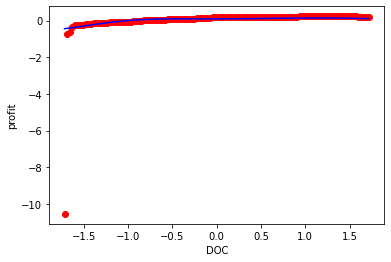

In [31]:
plt.scatter(X, y, color = 'red') 
plt.plot(X, regressor.predict(X), color = 'blue') 
plt.xlabel('DOC') 
plt.ylabel('profit') 
plt.show()

In [406]:
#X

In [32]:
len(y)



116

In [33]:
mean_squared_error(y, regressor.predict(X))

0.8887701498756254

In [34]:
len(y)

116

In [35]:
len(regressor.predict(X))

116

In [36]:
def mean_absolute_percentage_error(y_predicted,y_test):
    y_predicted,y_test = np.array(y_predicted), np.array(y_test)
    return np.mean(np.abs((y_test-y_predicted)/y_test)) * 100

In [37]:
mape=mean_absolute_percentage_error(y, regressor.predict(X))
mape

325.4378170856761

In [38]:
for i in profit:
    print(i)

-1539995.238095238
-222863.26530612243
-175654.4973544974
-17520.198848770277
-1542.5108225108224
-1372.4404761904761
-986.3512677798392
-797.7928949357522
-769.4104286625972
-739.8679041156956
-732.1062623474552
-717.4497538456742
-686.516428644344
-649.6235167086081
-633.5956085973266
-616.1175029268927
-602.569411405539
-578.1593661267744
-567.0581217835951
-552.3810209879928
-536.8543991581516
-509.70012961666737
-507.49321833065676
-505.3741112603933
-501.76634388934644
-503.21332849843543
-488.62700873270376
-481.3998778148358
-473.14218679858527
-449.30083031784795
-414.1747890866536
-387.08220663499407
-383.77786954565795
-340.8409861412066
-321.67515702617106
-319.44362059090116
-309.31958730800767
-300.5991614007116
-297.8219077720807
-291.70989246207
-286.5450428083966
-282.23376120656195
-278.69848472325634
-269.4113511246179
-259.86954964617263
-253.67947687135108
-243.36533986025933
-231.6106637675437
-234.2363865327735
-229.46796491279338
-229.86694355672944
-223.3337439

In [41]:
profit[98]

9.898282032556779